<h2>Final Project Instructions: Analysis of Diabetes and Fracture Prevalences</h2>

# Overview
This project involves analyzing a dataset containing demographic and health data for a specific population. Key data points include age, gender, race, ethnicity, diabetes status, and fracture occurrences. The dataset is provided in an Excel file with multiple sheets.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Part 1: Data Cleaning
- **Objective**: Prepare your dataset for analysis by cleaning, formatting, and merging multiple sheets.
- **Tasks**:
  1. Load the Excel file and explore the contents of each sheet to understand the variables and data structure.
  2. Merge sheets using the 'anon_id' as a key to create a comprehensive dataset. Ensure that you handle any discrepancies or duplications carefully.
  3. Identify and handle missing values in the merged dataset.
  4. Correct any inconsistencies in data types (e.g., ensuring numeric variables are treated as such).
  5. Create new columns if needed (e.g., an age group column, diabetic status, fracture status , etc).
  6. Drop irrelevant columns to simplify your analysis.


In [ ]:
!git clone https://github.com/m-rafiul-islam/uiw-ds

fatal: destination path 'uiw-ds' already exists and is not an empty directory.


In [ ]:
import os
prompt = '!git clone https://github.com/m-rafiul-islam/uiw-ds'
os.system(prompt)

32512

In [ ]:
import pandas as pd
file_path = '/content/uiw-ds/Copy of WM_SAT_Emp_Population_Output_UIW_20221003 (003).xlsx'
dfs = pd.read_excel(file_path,sheet_name = None)
dfs

{'Target_population':                                     anon_id member_gender  member_age  \
 0      F7D31775-C766-437C-8F20-5873168374F3             M          75   
 1      5E33C22D-198D-4771-A456-A711FAB53E15             M          81   
 2      5F430FF2-346F-434A-8A45-04D5795F0EEC             M          79   
 3      C5984BA6-37B2-4315-A52B-3C28E8DD34CA             M          76   
 4      4CEB8191-1B88-4FDB-A0BC-05AD96A125BA             M          86   
 ...                                     ...           ...         ...   
 26505  27CAD9DA-FED2-4F7D-B265-2D6E52209DE4             M          61   
 26506  39DC8F1F-32B9-41BC-885E-6E29F1C79BB8             M          78   
 26507  2B3165D7-5305-469D-8DD2-2257D94CB16F             M          66   
 26508  99D097C8-3A95-4BBF-9CC2-8793895710B6             M          68   
 26509  8DDCE1E6-B366-44A8-9C7F-C2B4279A0EAB             M          72   
 
                member_race        Member_Ethnicity       market  
 0                 His

In [ ]:
dfs.keys()

dict_keys(['Target_population', 'Diabetic_Pop', 'Fracture_pop', 'Smoking_pop', 'ETOH_pop', 'Gluc_lab_pop', 'A1c_lab_pop', 'Vit_D_Pop', 'Alk_Phos_pop', 'testost_pop', 'calcium_pop', 'glom_filt_pop', 'Insulin_pop', 'Statin_pop', 'Glucocorticoid_pop', 'DEXA_pop'])

In [ ]:
Target_population_df = dfs['Target_population']
Target_population_df

,anon_id,member_gender,member_age,member_race,Member_Ethnicity,market
0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,San Antonio
1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,San Antonio
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,San Antonio
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,San Antonio
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,San Antonio
...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,San Antonio
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,San Antonio
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,San Antonio
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,San Antonio


In [ ]:
Target_population_df.columns

Index(['anon_id', 'member_gender', 'member_age', 'member_race',
       'Member_Ethnicity', 'market'],
      dtype='object')

In [ ]:
# all members are male -- we can drop this column
# all members are from SA -- we can drop this column as well
Target_population_df['member_gender'].value_counts()

member_gender
M    26510
Name: count, dtype: int64

In [ ]:
# each member id is unique
Target_population_df['anon_id'].value_counts().head()

anon_id
F7D31775-C766-437C-8F20-5873168374F3    1
F108B773-178F-4111-BCBF-995084E06434    1
600AA276-9115-4094-A718-075E52C48205    1
42879B80-2324-4906-80C6-1D816227DD9B    1
C6906547-FC38-45DB-A491-93B630A9B210    1
Name: count, dtype: int64

In [ ]:
Target_population_df['member_race'].unique()

array(['Hispanic', nan, 'White', 'Black or African American',
       'Other Race', 'Declined to Specify',
       'American Indian or Alaska Native', 'Unreported/Refused to Report',
       'Black', 'Asian', 'African American', 'Mexican American Indian',
       'Native Hawaiian or Other Pacific Islander', 'English', 'European',
       'Declined To Specify', 'American Indian', 'Other Pacific Islander',
       'white', 'White Earth', 'Spanish American Indian', 'Vietnamese',
       'Caucasian'], dtype=object)

In [ ]:
# There are 22 different documented races
Target_population_df['member_race'].nunique()

22

In [ ]:
Target_population_df['member_race'].value_counts()

member_race
White                                        7727
Hispanic                                     7423
Other Race                                    829
Unreported/Refused to Report                  791
Declined to Specify                           688
Black or African American                     598
Asian                                         124
African American                               21
American Indian or Alaska Native               17
Native Hawaiian or Other Pacific Islander      12
Declined To Specify                             9
Mexican American Indian                         8
English                                         5
Other Pacific Islander                          3
Black                                           2
Spanish American Indian                         2
European                                        1
American Indian                                 1
white                                           1
White Earth                           

In [ ]:
#combine repeated values

In [ ]:
Target_population_df['Member_Ethnicity'].value_counts()

Member_Ethnicity
Hispanic or Latino        9580
Not Hispanic or Latino    6832
Refused to Report         1177
Declined to Specify        591
Mexican                     12
Mexican American             5
Latin American               1
Puerto Rican                 1
Central American             1
Name: count, dtype: int64

In [ ]:
#combine 'Refused to Report' and 'Declined to Specify'

In [ ]:
Target_population_df.drop(columns=['member_gender','market'])

,anon_id,member_age,member_race,Member_Ethnicity
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN
...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN


In [ ]:
Target_population_df['Member_Ethnicity'].describe()

count                  18200
unique                     9
top       Hispanic or Latino
freq                    9580
Name: Member_Ethnicity, dtype: object

In [ ]:
Target_population_df['member_age'].mean()

72.25877027536778

In [ ]:
Target_population_df['member_age'].min()

60

In [ ]:
dfs.keys()

dict_keys(['Target_population', 'Diabetic_Pop', 'Fracture_pop', 'Smoking_pop', 'ETOH_pop', 'Gluc_lab_pop', 'A1c_lab_pop', 'Vit_D_Pop', 'Alk_Phos_pop', 'testost_pop', 'calcium_pop', 'glom_filt_pop', 'Insulin_pop', 'Statin_pop', 'Glucocorticoid_pop', 'DEXA_pop'])

In [ ]:
Diabetic_Pop_df = dfs['Diabetic_Pop']
Diabetic_Pop_df

,anon_id,earliest_diabetes_dx
0,F7D31775-C766-437C-8F20-5873168374F3,2012-02-16
1,5F430FF2-346F-434A-8A45-04D5795F0EEC,2016-02-05
2,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,2012-02-13
3,262B650A-A9A4-4757-BE2C-F7D1547B6DF8,2012-04-09
4,B82D7718-139E-41AB-90CB-A04DE970E3C7,2012-01-09
...,...,...
8677,A8D5773B-60A2-4FC9-9952-37C0278D0641,2016-08-24
8678,40283B2F-9783-4C8C-8B4E-078969CA6709,2015-03-27
8679,810FC5BE-CB80-46F6-B17F-BE00F34466F0,2015-03-12
8680,E2941D2F-920A-422F-B3C3-DC8AC89990E9,2018-12-06


In [ ]:
raw_url = 'https://raw.githubusercontent.com/m-rafiul-islam/uiw-ds/main/diabetic_data_short_status4.csv'
df_combined_short = pd.read_csv(raw_url)
df_combined_short

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx,frac_dx,frac_descr,on_insulins,diabetic_status,fracture_status
0,0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,2012-02-16,NaN,NaN,NaN,no,True,False
1,1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False
2,2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,2016-02-05,NaN,NaN,NaN,yes,True,False
3,3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,2012-02-13,NaN,NaN,NaN,no,True,False
4,4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False
26506,26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,yes,False,False
26507,26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,NaN,NaN,NaN,NaN,no,False,False
26508,26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False


## Merge

In [ ]:
df_merged = pd.merge(left=df_combined_short, right=dfs['Fracture_pop'], on= 'anon_id', how= 'outer')
df_merged

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,on_insulins,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y
0,0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,2012-02-16,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
1,1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
2,2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,2016-02-05,NaN,NaN,NaN,yes,True,False,NaN,NaN,NaN
3,3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,2012-02-13,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
4,4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26506,26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,yes,False,False,NaN,NaN,NaN
26507,26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26508,26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN


In [ ]:
dfs.keys()
dfs['Fracture_pop']

,anon_id,latest_frac_dx,frac_dx,frac_descr
0,5F5063CE-686D-4A92-B0B8-5B2996221F38,2012-01-06,805.9,Open fracture of unspecified part of vertebral...
1,99123EA6-F708-41F8-BB9C-9F8458AC447C,2012-01-10,805.4,Closed fracture of lumbar vertebra without men...
2,4274D0F0-BAC3-44A8-9697-90E938CB4FDC,2012-01-13,820.8,Closed fracture of unspecified part of neck of...
3,21CE6E8E-787E-4091-95D4-3DD6C17751DD,2012-01-19,821.10,Open fracture of unspecified part of femur
4,127D5E0A-B489-46A7-BA35-45313899C339,2012-01-30,733.13,Pathologic fracture of vertebrae
...,...,...,...,...
1616,60AA80A4-44FD-4ABC-93ED-84BDB0F7BB01,2020-12-31,S52.502D,Unspecified fracture of the lower end of left ...
1617,D71708B6-C78C-422F-B1A1-1AA453E1E094,2020-12-31,S72.001A,Fracture of unspecified part of neck of right ...
1618,0D15AB20-57AC-4F4D-A54A-20587B0ABE3D,2020-12-31,M81.8,Other osteoporosis without current pathologica...
1619,88838264-0E86-4270-B25E-BDE1FAB8EEB5,2020-12-31,S92.011D,"Displaced fracture of body of right calcaneus,..."


In [ ]:
#new columns
# dfs['new column']= dfs['old column'].notna()
# creates a true/false column based on the information from the old column

df_merged['diabetic_status']= df_merged['earliest_diabetes_dx'].notna()
df_merged

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,on_insulins,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y
0,0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,2012-02-16,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
1,1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
2,2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,2016-02-05,NaN,NaN,NaN,yes,True,False,NaN,NaN,NaN
3,3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,2012-02-13,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN
4,4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26506,26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,yes,False,False,NaN,NaN,NaN
26507,26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN
26508,26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN


In [ ]:
df_2 = pd.merge(left=df_merged, right=dfs['Smoking_pop'], on= 'anon_id', how= 'outer')
df_2

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,on_insulins,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y,most_recent_smoking_dx
0,0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,2012-02-16,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN,2019-06-17
1,1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
2,2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,2016-02-05,NaN,NaN,NaN,yes,True,False,NaN,NaN,NaN,NaN
3,3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,2012-02-13,NaN,NaN,NaN,no,True,False,NaN,NaN,NaN,2019-07-22
4,4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
26506,26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,yes,False,False,NaN,NaN,NaN,NaN
26507,26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN
26508,26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN


In [ ]:
df_3 = pd.merge(left=df_2, right=dfs['A1c_lab_pop'], on= 'anon_id', how= 'outer')
df_3

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,...,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y,most_recent_smoking_dx,Lab_Result_Date,Lab_Result_Name,A1C_value,A1C_Measure
0,0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,2012-02-16,NaN,NaN,NaN,...,True,False,NaN,NaN,NaN,2019-06-17,2011-08-22,HEMOGLOBIN A1C,5.4,%
1,1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,2016-02-05,NaN,NaN,NaN,...,True,False,NaN,NaN,NaN,NaN,2011-08-17,HEMOGLOBIN A1C,6.0,%
3,3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,2012-02-13,NaN,NaN,NaN,...,True,False,NaN,NaN,NaN,2019-07-22,2011-07-28,HEMOGLOBIN A1C,6.8,%
4,4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,2011-09-02,HEMOGLOBIN A1C,9.9,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,2019-08-31,Hemoglobin A1c,5.7,%
26506,26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,2015-07-07,Hemoglobin A1c,5.9,%
26507,26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26508,26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_4 = pd.merge(left=df_3, right=dfs['testost_pop'], on= 'anon_id', how= 'outer')
df_4

,Unnamed: 0,anon_id,member_gender,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,frac_dx_x,frac_descr_x,...,frac_descr_y,most_recent_smoking_dx,Lab_Result_Date_x,Lab_Result_Name_x,A1C_value,A1C_Measure,Lab_Result_Date_y,Lab_Result_Name_y,testost_val,testost_meas
0,0,F7D31775-C766-437C-8F20-5873168374F3,M,75,Hispanic,Not Hispanic or Latino,2012-02-16,NaN,NaN,NaN,...,NaN,2019-06-17,2011-08-22,HEMOGLOBIN A1C,5.4,%,NaN,NaN,NaN,NaN
1,1,5E33C22D-198D-4771-A456-A711FAB53E15,M,81,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5F430FF2-346F-434A-8A45-04D5795F0EEC,M,79,Hispanic,Hispanic or Latino,2016-02-05,NaN,NaN,NaN,...,NaN,NaN,2011-08-17,HEMOGLOBIN A1C,6.0,%,NaN,NaN,NaN,NaN
3,3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,M,76,White,Not Hispanic or Latino,2012-02-13,NaN,NaN,NaN,...,NaN,2019-07-22,2011-07-28,HEMOGLOBIN A1C,6.8,%,2012-05-16,"TESTOSTERONE, SERUM",73,NG/DL
4,4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,M,86,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2011-09-02,HEMOGLOBIN A1C,9.9,%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,M,61,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-08-31,Hemoglobin A1c,5.7,%,NaN,NaN,NaN,NaN
26506,26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,M,78,Hispanic,Hispanic or Latino,NaN,NaN,NaN,NaN,...,NaN,NaN,2015-07-07,Hemoglobin A1c,5.9,%,NaN,NaN,NaN,NaN
26507,26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,M,66,Declined to Specify,Mexican,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-19,"TESTOSTERONE, SERUM",530,NG/DL
26508,26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,M,68,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-02,"Testosterone, Serum",378,ng/dL


In [ ]:
df_5 = df_4.drop(columns=['Unnamed: 0','member_gender','frac_dx_x','frac_descr_x','Lab_Result_Date_x','Lab_Result_Name_x','Lab_Result_Date_y','Lab_Result_Name_y','testost_meas','A1C_Measure'], axis = 1)
df_5

,anon_id,member_age,member_race,Member_Ethnicity,earliest_diabetes_dx,latest_frac_dx_x,on_insulins,diabetic_status,fracture_status,latest_frac_dx_y,frac_dx_y,frac_descr_y,most_recent_smoking_dx,A1C_value,testost_val
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,2012-02-16,NaN,no,True,False,NaN,NaN,NaN,2019-06-17,5.4,NaN
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,2016-02-05,NaN,yes,True,False,NaN,NaN,NaN,NaN,6.0,NaN
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,2012-02-13,NaN,no,True,False,NaN,NaN,NaN,2019-07-22,6.8,73
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,9.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,5.7,NaN
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,NaN,NaN,yes,False,False,NaN,NaN,NaN,NaN,5.9,NaN
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,NaN,530
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,NaN,NaN,no,False,False,NaN,NaN,NaN,NaN,NaN,378


In [ ]:
df_6 = df_5.drop(columns=['earliest_diabetes_dx','latest_frac_dx_x','latest_frac_dx_y','frac_dx_y','frac_descr_y'],axis=1)
df_6

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,most_recent_smoking_dx,A1C_value,testost_val
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,False,2019-06-17,5.4,NaN
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,False,NaN,NaN,NaN
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,False,NaN,6.0,NaN
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,False,2019-07-22,6.8,73
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,False,NaN,9.9,NaN
...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,False,NaN,5.7,NaN
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,False,NaN,5.9,NaN
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,False,NaN,NaN,530
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,False,NaN,NaN,378


In [ ]:
df_6['smoker_status']= df_6['most_recent_smoking_dx'].notna()
df_6

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,most_recent_smoking_dx,A1C_value,testost_val,smoker_status
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,False,2019-06-17,5.4,NaN,True
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,False,NaN,NaN,NaN,False
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,False,NaN,6.0,NaN,False
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,False,2019-07-22,6.8,73,True
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,False,NaN,9.9,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,False,NaN,5.7,NaN,False
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,False,NaN,5.9,NaN,False
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,False,NaN,NaN,530,False
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,False,NaN,NaN,378,False


In [ ]:
df_7 = df_6.drop(['most_recent_smoking_dx'],axis=1)
df_7

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,False,5.4,NaN,True
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,False,NaN,NaN,False
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,False,6.0,NaN,False
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,False,6.8,73,True
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,False,9.9,NaN,False
...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,False,5.7,NaN,False
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,False,5.9,NaN,False
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,False,NaN,530,False
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,False,NaN,378,False


In [ ]:
df_8 = pd.merge(left=df_7, right=dfs['calcium_pop'], on= 'anon_id', how= 'outer')
df_8

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status,Lab_Result_Date,Lab_Result_Name,calcium_val,calcium_meas
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,False,5.4,NaN,True,2011-08-22,"CALCIUM, SERUM",8.9,MG/DL
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,False,6.0,NaN,False,2011-06-14,"CALCIUM, SERUM",9.2,MG/DL
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,False,6.8,73,True,2011-05-12,"CALCIUM, SERUM",9.9,MG/DL
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,False,9.9,NaN,False,2011-09-02,"CALCIUM, SERUM",9.0,MG/DL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,False,5.7,NaN,False,2019-08-31,Calcium,9.5,mg/dL
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,False,5.9,NaN,False,2015-07-07,"Calcium, Serum",9.1,mg/dL
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,False,NaN,530,False,NaN,NaN,NaN,NaN
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,False,NaN,378,False,2015-04-30,"CALCIUM, SERUM",9.3,MG/DL


In [ ]:
df_9 = df_8.drop(columns=['Lab_Result_Date','Lab_Result_Name','calcium_meas'],axis=1)
df_9

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status,calcium_val
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,False,5.4,NaN,True,8.9
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,False,NaN,NaN,False,NaN
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,False,6.0,NaN,False,9.2
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,False,6.8,73,True,9.9
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,False,9.9,NaN,False,9.0
...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,False,5.7,NaN,False,9.5
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,False,5.9,NaN,False,9.1
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,False,NaN,530,False,NaN
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,False,NaN,378,False,9.3


In [ ]:
df_9 = pd.merge(left=df_8, right=dfs['Vit_D_Pop'], on= 'anon_id', how= 'outer')
df_9

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status,Lab_Result_Date_x,Lab_Result_Name_x,calcium_val,calcium_meas,Lab_Result_Date_y,Lab_Result_Name_y,Vit_D_val,Vit_D_meas
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,False,5.4,NaN,True,2011-08-22,"CALCIUM, SERUM",8.9,MG/DL,NaN,NaN,NaN,NaN
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,False,6.0,NaN,False,2011-06-14,"CALCIUM, SERUM",9.2,MG/DL,2016-01-26,"VITAMIN D, 25-HYDROXY",29.4,NG/ML
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,False,6.8,73,True,2011-05-12,"CALCIUM, SERUM",9.9,MG/DL,2011-01-07,"VITAMIN D, 25-HYDROXY",73.7,NG/ML
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,False,9.9,NaN,False,2011-09-02,"CALCIUM, SERUM",9.0,MG/DL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,False,5.7,NaN,False,2019-08-31,Calcium,9.5,mg/dL,2020-02-12,"Vitamin D, 25-Hydroxy",9.3,ng/mL
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,False,5.9,NaN,False,2015-07-07,"Calcium, Serum",9.1,mg/dL,2018-09-10,"VITAMIN D, 25-HYDROXY",38.900000,ng/mL
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,False,NaN,530,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,False,NaN,378,False,2015-04-30,"CALCIUM, SERUM",9.3,MG/DL,2015-04-30,"VITAMIN D, 25-HYDROXY",51.3,NG/ML


In [ ]:
df_10 = df_9.drop(columns=['calcium_meas','Lab_Result_Date_y','Lab_Result_Name_y','Vit_D_meas','Lab_Result_Date_x','Lab_Result_Name_x'], axis=1)
df_10

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,fracture_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,False,5.4,NaN,True,8.9,NaN
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,False,NaN,NaN,False,NaN,NaN
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,False,6.0,NaN,False,9.2,29.4
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,False,6.8,73,True,9.9,73.7
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,False,9.9,NaN,False,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,False,5.7,NaN,False,9.5,9.3
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,False,5.9,NaN,False,9.1,38.900000
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,False,NaN,530,False,NaN,NaN
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,False,NaN,378,False,9.3,51.3


In [ ]:
df_10 = df_10[[col for col in df_10.columns if col !='fracture_status']+['fracture_status']]
df_10

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,5.4,NaN,True,8.9,NaN,False
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,NaN,NaN,False,NaN,NaN,False
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,6.0,NaN,False,9.2,29.4,False
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,6.8,73,True,9.9,73.7,False
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,9.9,NaN,False,9.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,5.7,NaN,False,9.5,9.3,False
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,5.9,NaN,False,9.1,38.900000,False
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,NaN,530,False,NaN,NaN,False
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,NaN,378,False,9.3,51.3,False


In [ ]:
df_final = df_10
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,5.4,NaN,True,8.9,NaN,False
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,NaN,NaN,False,NaN,NaN,False
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,6.0,NaN,False,9.2,29.4,False
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,6.8,73,True,9.9,73.7,False
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,9.9,NaN,False,9.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,5.7,NaN,False,9.5,9.3,False
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,5.9,NaN,False,9.1,38.900000,False
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,NaN,530,False,NaN,NaN,False
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,NaN,378,False,9.3,51.3,False


In [ ]:
s = df_final['calcium_val']
s_numeric = pd.to_numeric(s, errors='coerce')
s_numeric

0        8.9
1        NaN
2        9.2
3        9.9
4        9.0
        ... 
26505    9.5
26506    9.1
26507    NaN
26508    9.3
26509    9.4
Name: calcium_val, Length: 26510, dtype: float64

In [ ]:
df_final['calcium_val'] = pd.to_numeric(df_final['calcium_val'], errors='coerce')
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,5.4,NaN,True,8.9,NaN,False
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,NaN,NaN,False,NaN,NaN,False
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,6.0,NaN,False,9.2,29.4,False
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,6.8,73,True,9.9,73.7,False
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,9.9,NaN,False,9.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,5.7,NaN,False,9.5,9.3,False
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,5.9,NaN,False,9.1,38.900000,False
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,NaN,530,False,NaN,NaN,False
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,NaN,378,False,9.3,51.3,False


In [ ]:
df_all_columns = df_final.columns

In [ ]:
col_list =[]
for col in df_all_columns:
  print(col)
  if 'val' in col or 'value' in col:
    col_list.append(col)
col_list

anon_id
member_age
member_race
Member_Ethnicity
on_insulins
diabetic_status
A1C_value
testost_val
smoker_status
calcium_val
Vit_D_val
fracture_status


['A1C_value', 'testost_val', 'calcium_val', 'Vit_D_val']

In [ ]:
col_list

['A1C_value', 'testost_val', 'calcium_val', 'Vit_D_val']

In [ ]:
for item in col_list:
  df_final[item]= pd.to_numeric(df_final[item], errors='coerce')

In [ ]:
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,5.4,NaN,True,8.9,NaN,False
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,NaN,NaN,False,NaN,NaN,False
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,6.0,NaN,False,9.2,29.4,False
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,6.8,73.0,True,9.9,73.7,False
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,9.9,NaN,False,9.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,5.7,NaN,False,9.5,9.3,False
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,5.9,NaN,False,9.1,38.9,False
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,NaN,530.0,False,NaN,NaN,False
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,NaN,378.0,False,9.3,51.3,False


In [ ]:
def s_group(age):
  if age < 70:
    gp = 'u70'
  else:
    gp = 'a70'
  return gp

In [ ]:
x= 69
s_group(x)

'u70'

In [ ]:
df_final['member_age_sgroup']= df_final['member_age'].apply(lambda x: s_group(x))
df_final['member_age_sgroup']

0        a70
1        a70
2        a70
3        a70
4        a70
        ... 
26505    u70
26506    a70
26507    u70
26508    u70
26509    a70
Name: member_age_sgroup, Length: 26510, dtype: object

In [ ]:
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status,member_age_sgroup
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,5.4,NaN,True,8.9,NaN,False,a70
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,NaN,NaN,False,NaN,NaN,False,a70
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,6.0,NaN,False,9.2,29.4,False,a70
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,6.8,73.0,True,9.9,73.7,False,a70
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,9.9,NaN,False,9.0,NaN,False,a70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,5.7,NaN,False,9.5,9.3,False,u70
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,5.9,NaN,False,9.1,38.9,False,a70
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Declined to Specify,Mexican,no,False,NaN,530.0,False,NaN,NaN,False,u70
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,NaN,378.0,False,9.3,51.3,False,u70


In [ ]:
df_final['member_race'].value_counts()

member_race
White                                        7727
Hispanic                                     7423
Other Race                                    829
Unreported/Refused to Report                  791
Declined to Specify                           688
Black or African American                     598
Asian                                         124
African American                               21
American Indian or Alaska Native               17
Native Hawaiian or Other Pacific Islander      12
Declined To Specify                             9
Mexican American Indian                         8
English                                         5
Other Pacific Islander                          3
Black                                           2
Spanish American Indian                         2
European                                        1
American Indian                                 1
white                                           1
White Earth                           

In [ ]:
for i in range(len(df_final['member_race'])):
  # print(df_final.iloc[i,2])
  item = df_final.iloc[i,2]
  if  item == 'white' or item == 'Caucasian':
    print(item)
    df_final.iloc[i,2] == 'White'

white
Caucasian


In [ ]:
# replace and combine duplicated races
df_final['member_race'] = df_final['member_race'].replace(['white','Caucasian','European','English'],'White')
df_final['member_race'] = df_final['member_race'].replace(['African American','Black'], 'Black or African American')
df_final['member_race'] = df_final['member_race'].replace(['Other Pacific Islander'],'Native Hawaiian or Other Pacific Islander')
df_final['member_race'] = df_final['member_race'].replace(['Declined to Specify','Unreported/Refused to Report','Declined To Specify'],'Other Race')
df_final['member_race'] = df_final['member_race'].replace(['American Indian','White Earth','Spanish American Indian','Mexican American Indian'],'American Indian or Alaska Native')
df_final['member_race'] = df_final['member_race'].replace(['Vietnamese'],'Asian')

In [ ]:
df_final['member_race'].value_counts()

member_race
White                                        7735
Hispanic                                     7423
Other Race                                   2317
Black or African American                     621
Asian                                         125
American Indian or Alaska Native               29
Native Hawaiian or Other Pacific Islander      15
Name: count, dtype: int64

## Final Dataframe

In [ ]:
df_final

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status,member_age_sgroup
0,F7D31775-C766-437C-8F20-5873168374F3,75,Hispanic,Not Hispanic or Latino,no,True,5.4,NaN,True,8.9,NaN,False,a70
1,5E33C22D-198D-4771-A456-A711FAB53E15,81,NaN,NaN,no,False,NaN,NaN,False,NaN,NaN,False,a70
2,5F430FF2-346F-434A-8A45-04D5795F0EEC,79,Hispanic,Hispanic or Latino,yes,True,6.0,NaN,False,9.2,29.4,False,a70
3,C5984BA6-37B2-4315-A52B-3C28E8DD34CA,76,White,Not Hispanic or Latino,no,True,6.8,73.0,True,9.9,73.7,False,a70
4,4CEB8191-1B88-4FDB-A0BC-05AD96A125BA,86,NaN,NaN,no,False,9.9,NaN,False,9.0,NaN,False,a70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26505,27CAD9DA-FED2-4F7D-B265-2D6E52209DE4,61,Hispanic,Hispanic or Latino,no,False,5.7,NaN,False,9.5,9.3,False,u70
26506,39DC8F1F-32B9-41BC-885E-6E29F1C79BB8,78,Hispanic,Hispanic or Latino,yes,False,5.9,NaN,False,9.1,38.9,False,a70
26507,2B3165D7-5305-469D-8DD2-2257D94CB16F,66,Other Race,Mexican,no,False,NaN,530.0,False,NaN,NaN,False,u70
26508,99D097C8-3A95-4BBF-9CC2-8793895710B6,68,NaN,NaN,no,False,NaN,378.0,False,9.3,51.3,False,u70


# Part 2: Exploratory Data Analysis (EDA)
- **Objective**: Gain insights into the data through visualization and summary statistics.
- **Tasks**:
  1. Generate summary statistics for key variables to understand central tendencies (mean, median, mode) and dispersion (stdev,range,etc.).
  2. Create visualizations to understand the distribution of key variables (histograms, box plots, violinplot).
  3. Explore relationships between features, such as the relationship between diabetes and fracture rates (find the prevelance of fractures among the diabetic population).
  4. Use groupby operations to explore differences in health outcomes by demographics like race and age.
  5. Do more if you can.




In [ ]:
df_final['member_age'].max()

89

In [ ]:
df_final['member_age'].min()

60

Text(0.5, 1.0, 'Target Population Ages')

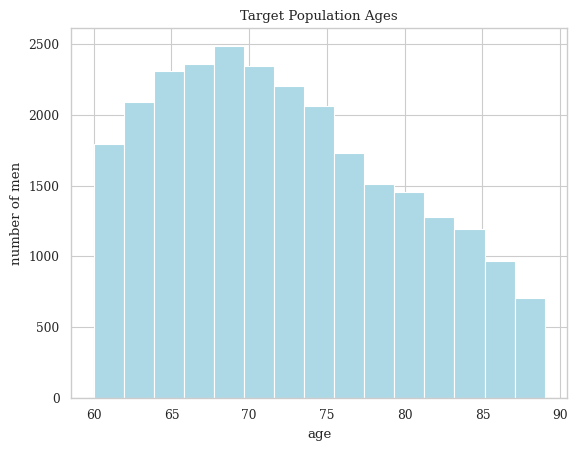

In [ ]:
# Target population age distribution
plt.hist(Target_population_df['member_age'],bins = 15, edgecolor = 'white',color='lightblue')
plt.xlabel('age')
plt.ylabel('number of men')
plt.title('Target Population Ages')

Text(0.5, 1.0, 'Distribution of Race')

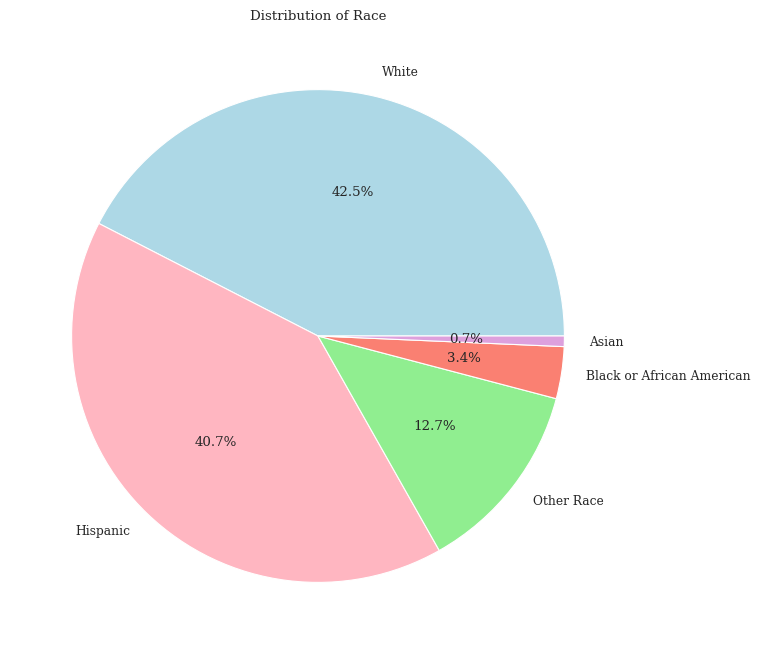

In [ ]:
# Distribution of race among the target population
plt.figure(figsize=(8,8))
data = df_final['member_race'].value_counts().head(5)
colors = ['lightblue', 'lightpink', 'lightgreen', 'salmon', 'plum']
plt.pie(data, labels= data.index, autopct= '%1.1f%%',colors=colors)
plt.title('Distribution of Race')

<Axes: xlabel='diabetic_status', ylabel='count'>

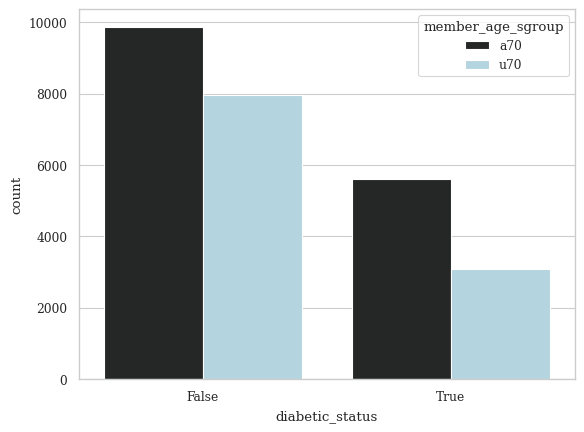

In [ ]:
#Diabetic vs. Non-diabetic count
sns.countplot(data = df_final, x = 'diabetic_status', palette='dark:lightblue', hue='member_age_sgroup')

In [ ]:
#the majority of the target population is above 70 and non-diabetic
#the minority of the target population is under 70 and diabetic

<Axes: xlabel='diabetic_status', ylabel='fracture_status'>

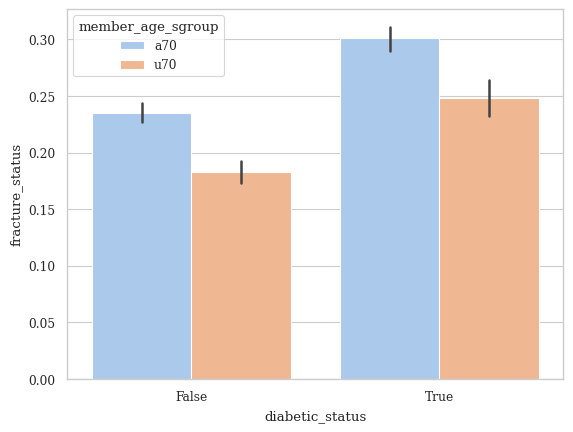

In [ ]:
#Diabetic status and fracture status
sns.barplot(data = df_final, x = "diabetic_status" , y = "fracture_status",hue= 'member_age_sgroup',estimator = np.std, palette='pastel')

In [ ]:
#Diabetics above 70 are most likely to suffer fractures
#Non-diabetics under 70 are least likely to suffer fractures

<Axes: xlabel='A1C_value'>

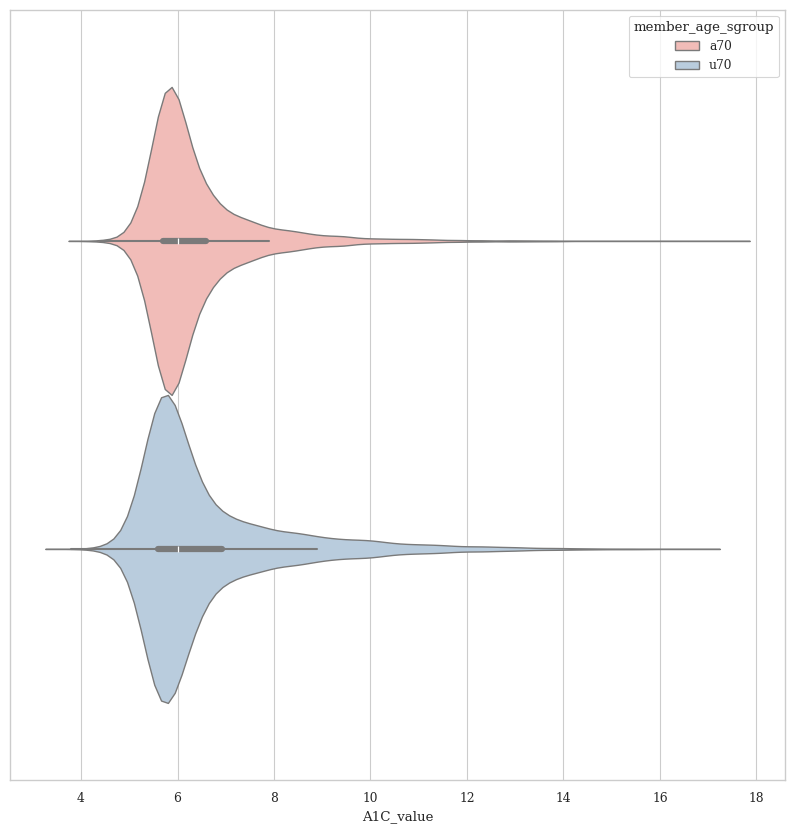

In [ ]:
#A1C values across target population
sns.set_theme(context = 'paper',style='whitegrid',palette='Pastel1',font='serif')
plt.figure(figsize=(10, 10))
sns.violinplot(data=df_final,x='A1C_value',hue='member_age_sgroup')

In [ ]:
#the average A1C value among the target population falls between the 5.0 and 7.5 values
#a healthy A1C value is below 5.7%
#a level of 5.7% to 6.4% indicates prediabetes
#a level of 6.5% or more indicates diabetes
#source: https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html#:~:text=Your%20A1C%20Result&text=A%20normal%20A1C%20level%20is,for%20developing%20type%202%20diabetes.

#The A1C value distribution is consistent with the distribution of diabetic v. non-diabetics within the target population
#the majority of members have healthy to pre-diabetic A1C values
#the minority of members have diabetic A1C values

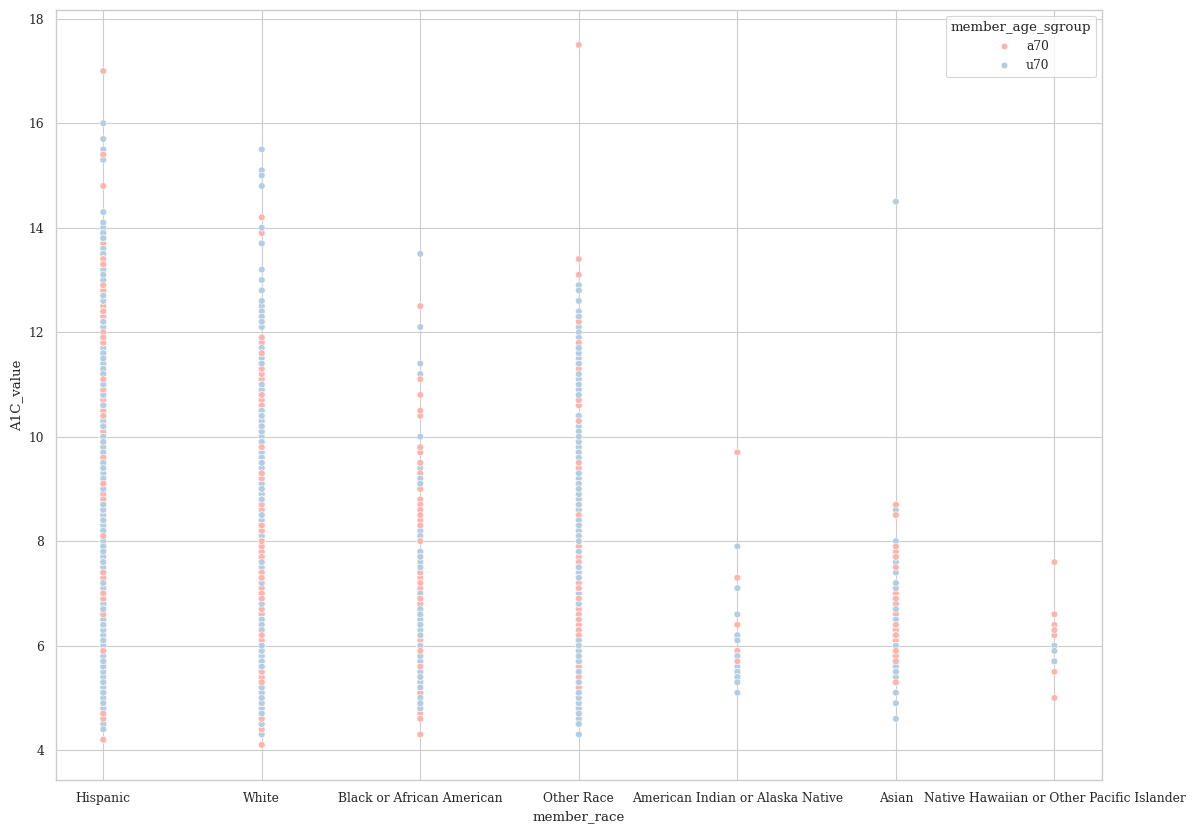

In [ ]:
#A1C values across race and age group
plt.figure(figsize=(13.5, 10))
sns.scatterplot(x='member_race',y='A1C_value',data = df_final, hue='member_age_sgroup')
plt.show()

# Part 3: Advanced Data Visualization
- **Objective**: Utilize advanced visualization techniques to reveal deeper insights into the data.
- **Tasks**:
  1. Use Seaborn to create more complex visualizations such as violin plots, pair plots, and heatmaps.
  2. Explore multi-variable relationships using facet grids or pair grids.
  3. Use hue, style, and palette to enhance visualizations and highlight different segments or trends in the data.
  4. Craft a narrative around your visualizations, explaining what insights they reveal about the data.


In [ ]:
#Creating s groups for advanced data visualization
df_u70 = df_final[df_final['member_age_sgroup'] == 'u70']
df_a70 = df_final[df_final['member_age_sgroup'] == 'a70']

In [ ]:
data = df_u70[['calcium_val','member_age']].corr()
data

,calcium_val,member_age
calcium_val,1.000000,-0.038667
member_age,-0.038667,1.000000


In [ ]:
data_2 = df_a70[['calcium_val','member_age']].corr()
data_2

,calcium_val,member_age
calcium_val,1.000000,-0.103485
member_age,-0.103485,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

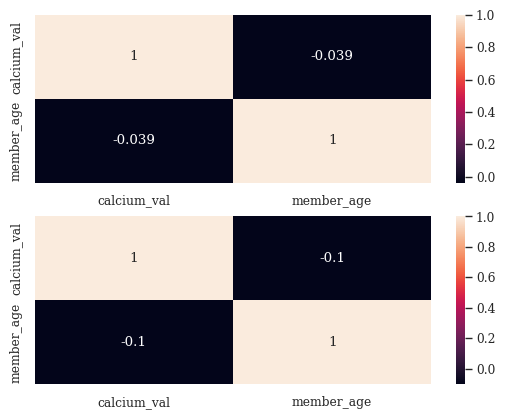

In [ ]:
fig, axes = plt.subplots(2,1)
sns.heatmap(data, ax=axes[0],annot=True)
sns.heatmap(data_2, ax=axes[1],annot=True)

<Axes: >

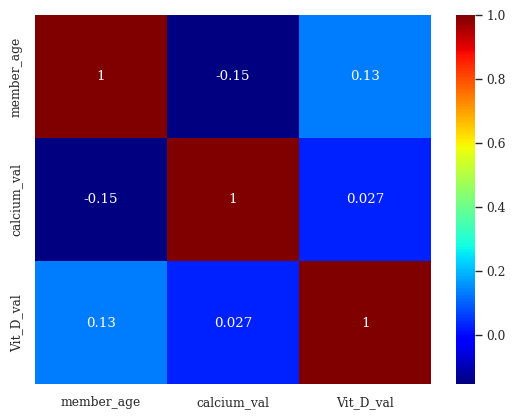

In [ ]:
cols = ['member_age','calcium_val','Vit_D_val']
df_map = df_final[cols].corr()
sns.heatmap(df_map,cmap='jet',annot=True,cbar=True)

In [ ]:
# as members age increases, vit_D increases (probably a supplement)
# as members age increases, calcium_val decreases
# almost no correlation between vit_D and calcium_val

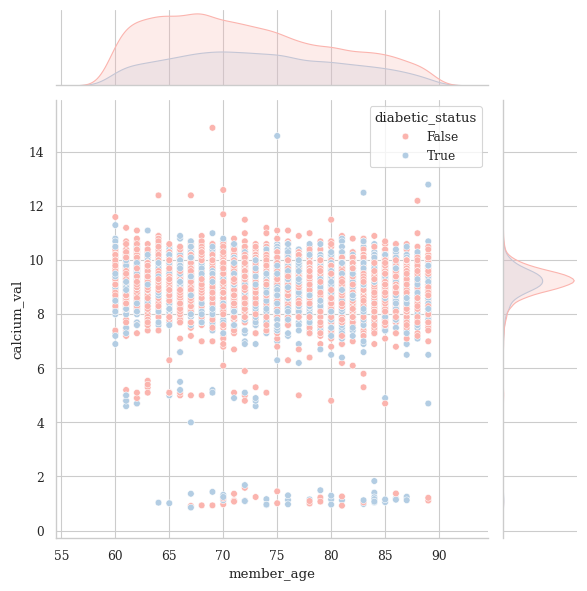

In [ ]:
#Finding a correlation between age, calcium value, and diabetic status
sns.jointplot(x='member_age',y='calcium_val',data = df_final, hue='diabetic_status')

In [ ]:
#While most calcium values are consistent among diabetics and non-diabetics,
#lower calcium values belong mainly to diabetics between 75-88
#this finding is consistent with the fact that diabetes leads to a "deterioration of calcium and bone metabolism"
#source: https://rdcu.be/dHBpf

In [ ]:
diabetic_fractures = df_final[(df_final['diabetic_status'] == True) & (df_final['fracture_status'] == True)]
diabetic_fractures

,anon_id,member_age,member_race,Member_Ethnicity,on_insulins,diabetic_status,A1C_value,testost_val,smoker_status,calcium_val,Vit_D_val,fracture_status,member_age_sgroup
12,4233060B-F88C-433A-B66B-B50A18246A01,89,Hispanic,Hispanic or Latino,no,True,5.4,NaN,True,8.2,15.0,True,a70
22,99B49830-6208-44A6-96EB-6849BCF4E5AF,87,White,Not Hispanic or Latino,no,True,6.3,NaN,False,9.9,27.7,True,a70
26,5A049389-7660-474A-8366-5514AC4C00EE,75,NaN,NaN,no,True,7.4,NaN,True,8.9,11.5,True,a70
40,DFB29A06-F54B-4BB8-B3D7-9141D2B32C71,82,Hispanic,Hispanic or Latino,yes,True,6.2,NaN,False,9.0,29.5,True,a70
79,1A5B501B-265C-49BE-9EB6-A239CA2AA2E6,86,Hispanic,Hispanic or Latino,no,True,5.5,NaN,False,9.3,53.0,True,a70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26399,1A85B444-CB6F-40C3-9F4D-4581B23FE22A,66,NaN,NaN,no,True,7.3,NaN,True,9.8,20.8,True,u70
26447,08CB8633-2228-4DD8-96D6-73B1ACEF7BC8,65,White,Not Hispanic or Latino,no,True,6.0,110.0,True,10.0,26.3,True,u70
26463,FA79EFEE-281E-4CB9-ADA2-E50374AED514,77,Other Race,Refused to Report,no,True,6.9,NaN,False,9.3,29.9,True,a70
26464,3FC2EF82-38E1-4F0D-B7B6-C2629B9B9E3E,65,Hispanic,Hispanic or Latino,no,True,9.9,10.9,False,9.3,31.6,True,u70


In [ ]:
#total number of diabetics with fractures = 767

In [ ]:
#Finding the prevalance of fractures among diabetics
diabetic_pop = 8682  # Total number of diabetic patients
fracture_cases = 767  # Number of diabetic patients with fractures
prevalence = (fracture_cases / diabetic_pop) * 100
prevalence

8.834369960838515

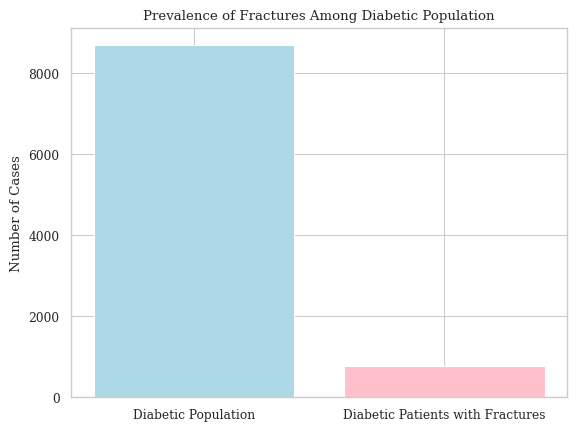

In [ ]:
#Distribution of fractures among diabetics

bar_labels = ['Diabetic Population', 'Diabetic Patients with Fractures']
bar_values = [diabetic_pop, fracture_cases]

plt.bar(bar_labels, bar_values, color=['lightblue', 'pink'])

plt.title('Prevalence of Fractures Among Diabetic Population')
plt.ylabel('Number of Cases')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


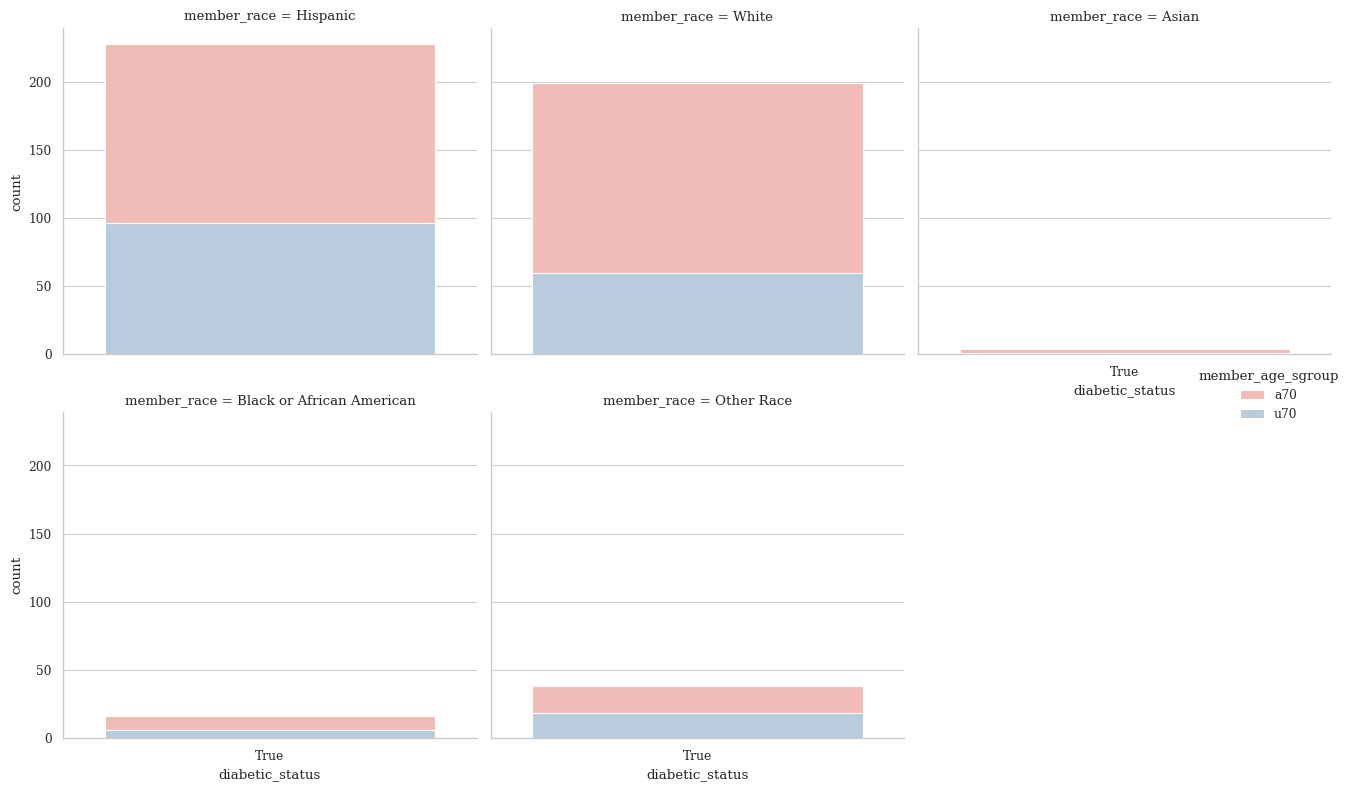

In [ ]:
#The distribution of diabetes across race and age
g = sns.FacetGrid(diabetic_fractures, col='member_race', col_wrap=3, height=4, hue='member_age_sgroup')
g.map(sns.countplot, 'diabetic_status')
g.add_legend()
plt.tight_layout()

In [ ]:
#The majority of diabetics from the target population are Hispanic and White men above 70
#The minority of diabetics are Asian men in both sgroups (a70 and u70)

<Axes: xlabel='testost_val'>

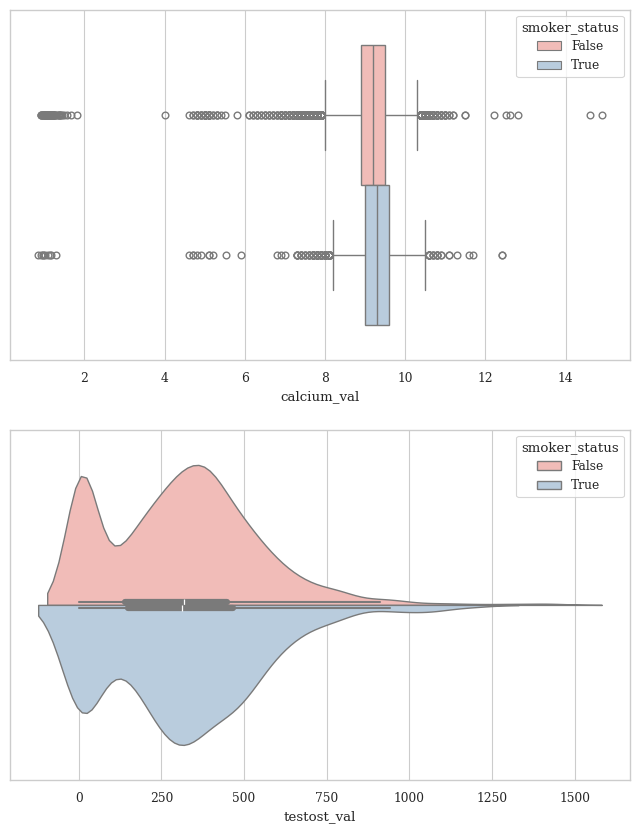

In [ ]:
#Does smoking affect calcium and/or testosterone values?
fig, axes = plt.subplots(2,1,figsize=(8,10))
sns.boxplot(data = df_final, x = 'calcium_val', ax = axes[0],hue='smoker_status')
sns.violinplot(data = df_final,  x = 'testost_val', ax = axes[1],hue='smoker_status',split=True)

In [ ]:
#smoking does not seem to affect calcium or testosterone values
#both smokers and non-smokers have similar values across all ages/demographics

# Part 4: Report Writing
- **Objective**: Compile your findings into a comprehensive report.
- **Tasks**:
  1. Document your data cleaning process, explaining why and how you merged the sheets and handled data issues.
  2. Present and discuss your EDA and advanced visualization findings with appropriate visualizations.
  3. Provide a conclusion that summarizes the key insights from your analysis and suggests practical implications or areas for further research

Report: https://docs.google.com/document/d/1NeFCfvQoNPuv_yBl-9yDUoeueQycF36TV3zylMFlNYA/edit?usp=sharing